In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/All Projects/Neurological-EEG/ICARE-Dataset.zip'

In [ ]:
import os
import math
import imblearn
import logging
import warnings
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

In [ ]:
df = pd.read_csv('/content/ICARE-Dataset/dataset.csv')

In [ ]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [ ]:
df.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [ ]:
data = df.copy()

In [ ]:
data_2 = data.drop(['Unnamed', 'y'], axis=1, inplace=False)


In [ ]:
df['y'].value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

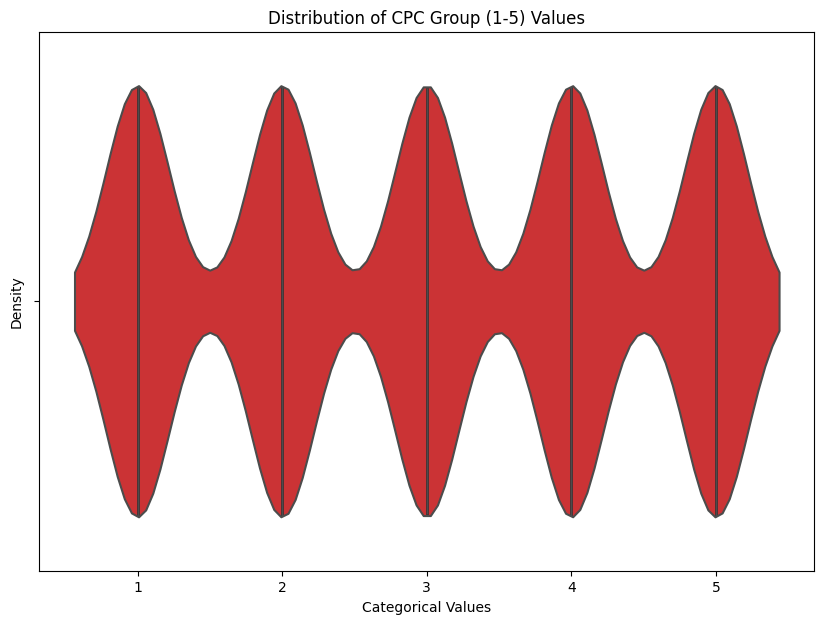

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.violinplot(x='y', data=data, inner='stick', palette='Set1')
plt.title('Distribution of CPC Group (1-5) Values')
plt.xlabel('Categorical Values')
plt.ylabel('Density')
plt.show()


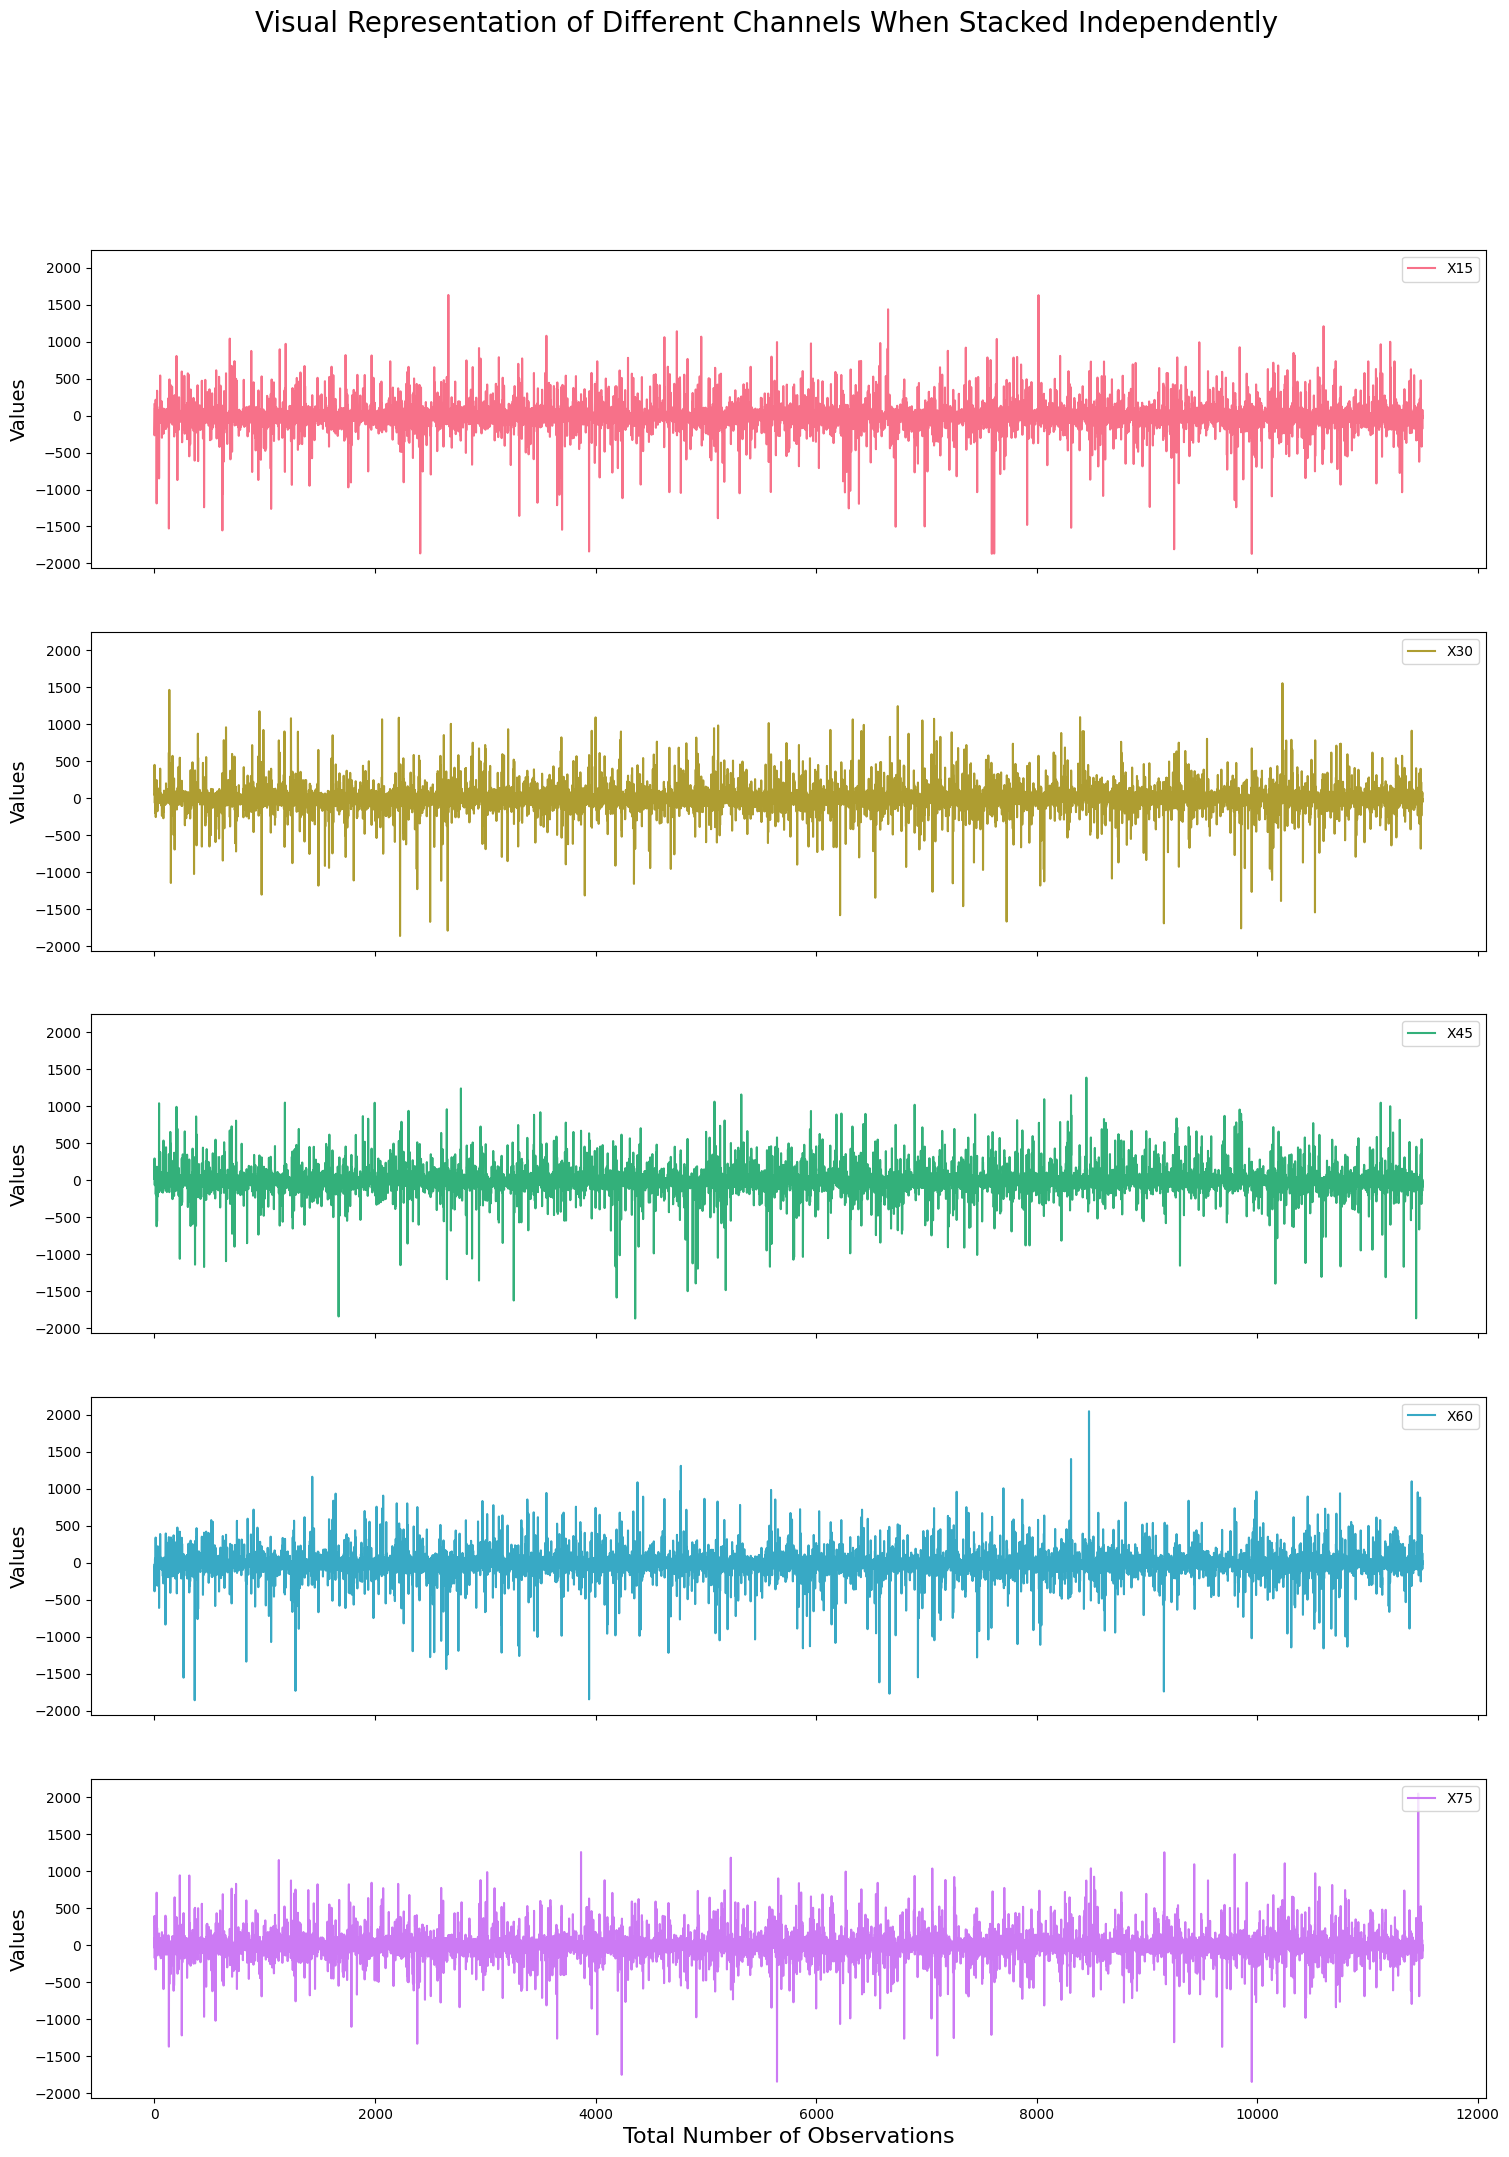

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a custom color palette for the lines
colors = sns.color_palette("husl", 5)
labels = ["X15", "X30", "X45", "X60", "X75"]

# Create a figure with subplots
fig, axs = plt.subplots(5, sharex=True, sharey=True, figsize=(18, 24))
fig.suptitle('Visual Representation of Different Channels When Stacked Independently', fontsize=20)

# Loop over axes
for i, ax in enumerate(axs):
    ax.plot(data.index, data[labels[i]], color=colors[i], label=labels[i])
    ax.legend(loc="upper right")

# Set x and y-axis labels
plt.xlabel('Total Number of Observations', fontsize=16)
for ax in axs:
    ax.set_ylabel('Values', fontsize=14)

# Use a dark grid style
sns.set(style="darkgrid")

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

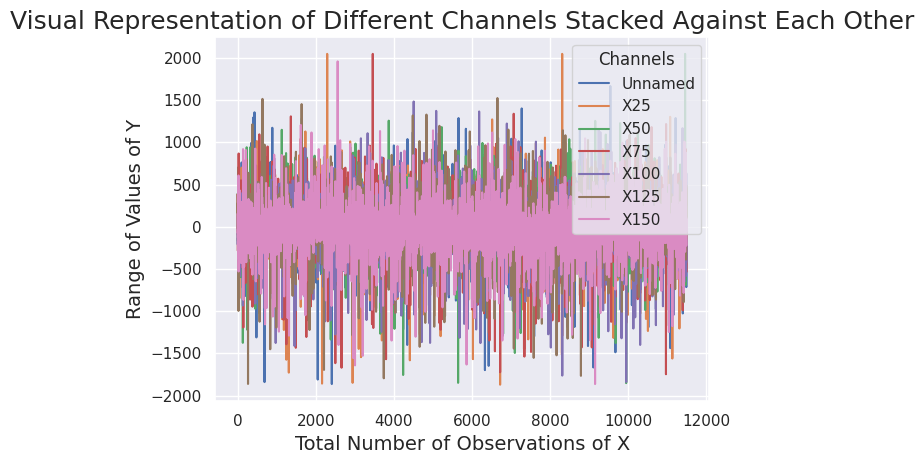

In [ ]:
sns.set_style("darkgrid")

# Create a figure with a size that's more suitable for a professional report
plt.figure(figsize=(10, 6))

# Plot every 25th column to reduce the clutter
data.loc[:, ::25].plot()

# Title and labels with increased font size
plt.title("Visual Representation of Different Channels Stacked Against Each Other", fontsize=18)
plt.xlabel("Total Number of Observations of X", fontsize=14)
plt.ylabel("Range of Values of Y", fontsize=14)

# Legend for channels with a title
plt.legend(title="Channels", labels=data.columns[::25], loc='upper right')

# Show the plot
plt.tight_layout()  # Ensure that labels fit within the figure
plt.show()

<ipython-input-27-c70d51923fc6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


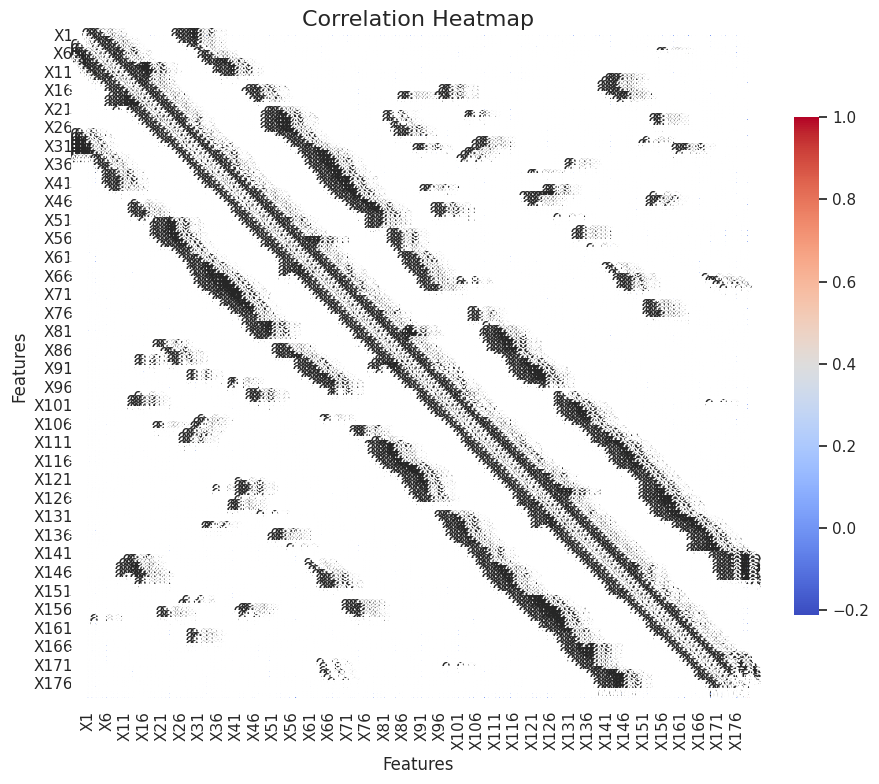

In [ ]:
# Create a correlation matrix
corr = data.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, square=True, cbar_kws={'shrink': 0.75})

# Title and labels with increased font size
plt.title("Correlation Heatmap", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Ensure that labels fit within the figure
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
data_2 = data.drop(["Unnamed"], axis=1).copy()
data_2['Output'] = data_2.y == 0
data_2['Output'] = data_2["Output"].astype(int)
data_2['y'] = data_2['y'].replace([2,3,4,5], 0)

In [ ]:
X = data_2.drop(['Output', 'y'], axis=1)
y = data_2['y']

In [ ]:
from imblearn.combine import SMOTEENN
from collections import Counter

# Count the class distribution before oversampling
class_distribution_before = Counter(y)
print('Class Distribution Before Oversampling:', class_distribution_before)

# Oversample the training dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_resampled, y_train_resampled = smenn.fit_resample(X, y)

# Count the class distribution after oversampling
class_distribution_after = Counter(y_train_resampled)
print('Class Distribution After Oversampling:', class_distribution_after)


Class Distribution Before Oversampling: Counter({0: 9200, 1: 2300})
Class Distribution After Oversampling: Counter({0: 9073, 1: 9056})


In [ ]:
from sklearn.model_selection import train_test_split

# Split the oversampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.4, random_state=42)

# Further split the testing set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the validation set
X_val_scaled = scaler.transform(X_val)

# Scale the test set
X_test_scaled = scaler.transform(X_test)
